In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import netCDF4 as nc
import pandas as pd
import numpy as np
from os import listdir
from os.path import isfile, join

# Load as an xarray Dataset, making sure the filename is correct
xr_data = xr.open_dataset('bi_2007.nc')

# Inspect the xarray dataset structure
print(xr_data)

<xarray.Dataset> Size: 2GB
Dimensions:          (lon: 1386, lat: 585, day: 365, crs: 1)
Coordinates:
  * lon              (lon) float64 11kB -124.8 -124.7 -124.7 ... -67.1 -67.06
  * lat              (lat) float64 5kB 49.4 49.36 49.32 ... 25.15 25.11 25.07
  * day              (day) datetime64[ns] 3kB 2007-01-01 ... 2007-12-31
  * crs              (crs) uint16 2B 3
Data variables:
    burning_index_g  (day, lat, lon) float64 2GB ...
Attributes: (12/19)
    geospatial_bounds_crs:      EPSG:4326
    Conventions:                CF-1.6
    geospatial_bounds:          POLYGON((-124.7666666333333 49.40000000000000...
    geospatial_lat_min:         25.066666666666666
    geospatial_lat_max:         49.40000000000000
    geospatial_lon_min:         -124.7666666333333
    ...                         ...
    date:                       04 July 2019
    note1:                      The projection information for this file is: ...
    note2:                      Citation: Abatzoglou, J.T., 2013, D

In [2]:
files = [f for f in listdir(".") if isfile(join(".", f))]

In [3]:
variable_names = {
    "bi" : "burning_index_g",
    "fm1000" : "dead_fuel_moisture_1000hr", 
    "rmax" : "relative_humidity",
    "fm100" : "dead_fuel_moisture_100hr",
    "pr" : "precipitation_amount",
    "vpd" : "mean_vapor_pressure_deficit",
    "sph" : "specific_humidity",
    "tmmx" : "air_temperature",
    "pet" : "potential_evapotranspiration",
    "etr" : "potential_evapotranspiration",
    "tmmn" : "air_temperature",
    "rmin" : "relative_humidity",
    "srad" : "surface_downwelling_shortwave_flux_in_air",
}

In [4]:
datasets = []
for file in files:
    if file.endswith(".nc"):
        key = file.split("_")[0]
        ds = xr.open_dataset(file).rename({variable_names[key] : key})
        datasets.append(ds)

In [5]:
dates = ["2007-06-03", "2007-06-24", "2007-07-11", "2007-07-28", "2007-08-06", "2007-08-19"]

In [6]:
len(datasets)

13

In [7]:
merged_ds = xr.merge(datasets)

In [8]:
merged_ds

<xarray.Dataset> Size: 31GB
Dimensions:  (lon: 1386, lat: 585, day: 365, crs: 1)
Coordinates:
  * lon      (lon) float64 11kB -124.8 -124.7 -124.7 ... -67.14 -67.1 -67.06
  * lat      (lat) float64 5kB 49.4 49.36 49.32 49.28 ... 25.15 25.11 25.07
  * day      (day) datetime64[ns] 3kB 2007-01-01 2007-01-02 ... 2007-12-31
  * crs      (crs) uint16 2B 3
Data variables: (12/13)
    bi       (day, lat, lon) float64 2GB ...
    etr      (day, lat, lon) float64 2GB ...
    fm1000   (day, lat, lon) float64 2GB ...
    fm100    (day, lat, lon) float64 2GB ...
    pet      (day, lat, lon) float64 2GB ...
    pr       (day, lat, lon) float64 2GB ...
    ...       ...
    rmin     (day, lat, lon) float64 2GB ...
    sph      (day, lat, lon) float64 2GB ...
    srad     (day, lat, lon) float64 2GB ...
    tmmn     (day, lat, lon) float64 2GB ...
    tmmx     (day, lat, lon) float64 2GB ...
    vpd      (day, lat, lon) float64 2GB ...
Attributes: (12/19)
    geospatial_bounds_crs:      EPSG:4326
    Conventions:                CF-1.6
    geospatial_bounds:          POLYGON((-124.7666666333333 49.40000000000000...
    geospatial_lat_min:         25.066666666666666
    geospatial_lat_max:         49.40000000000000
    geospatial_lon_min:         -124.7666666333333
    ...                         ...
    date:                       04 July 2019
    note1:                      The projection information for this file is: ...
    note2:                      Citation: Abatzoglou, J.T., 2013, Development...
    note3:                      Data in slices after last_permanent_slice (1-...
    note4:                      Data in slices after last_provisional_slice (...
    note5:                      Days correspond approximately to calendar day...

In [9]:
def construct_variable_datsets(date):
    variable_datasets = {}
    for variable in variable_names.keys():
        variable_datasets[variable] = merged_ds[variable].sel(day=date)
    return variable_datasets

In [10]:
variable_ds = construct_variable_datsets(dates[0])

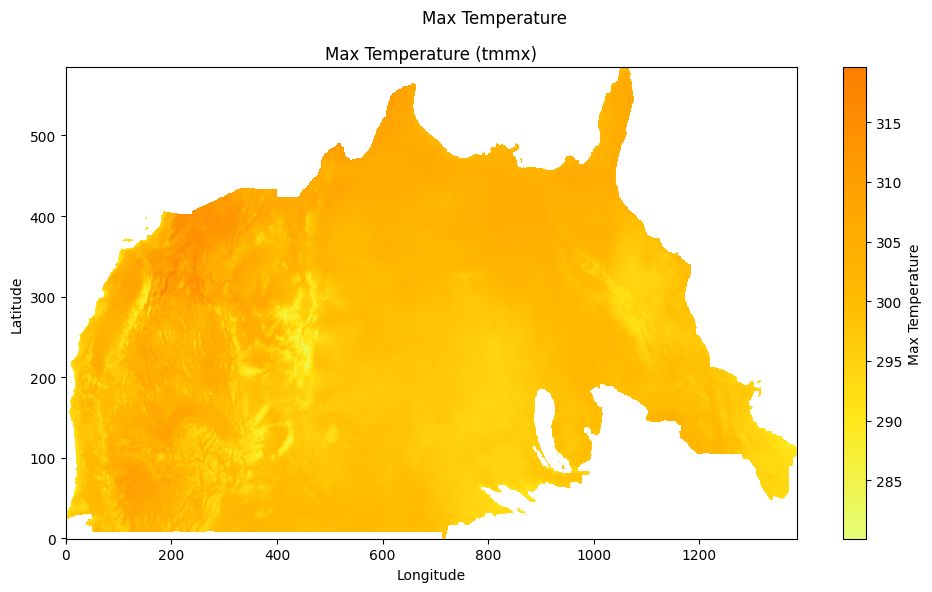

In [11]:
# Assuming `variable_ds` is the dataset with variables "tmmx" (max temperature) and "bi" (burning index)
fig, ax = plt.subplots(figsize=(10, 6))

# Color mapping visualization for "tmmx" (max temperature) using imshow
tmmx_data = variable_ds["tmmx"].values
im1 = ax.imshow(tmmx_data, cmap="Wistia", origin="lower", aspect='auto')
plt.colorbar(im1, ax=ax, orientation="vertical", label="Max Temperature")
ax.set_title("Max Temperature (tmmx)")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Overall title
fig.suptitle("Max Temperature")

plt.tight_layout()
plt.show()

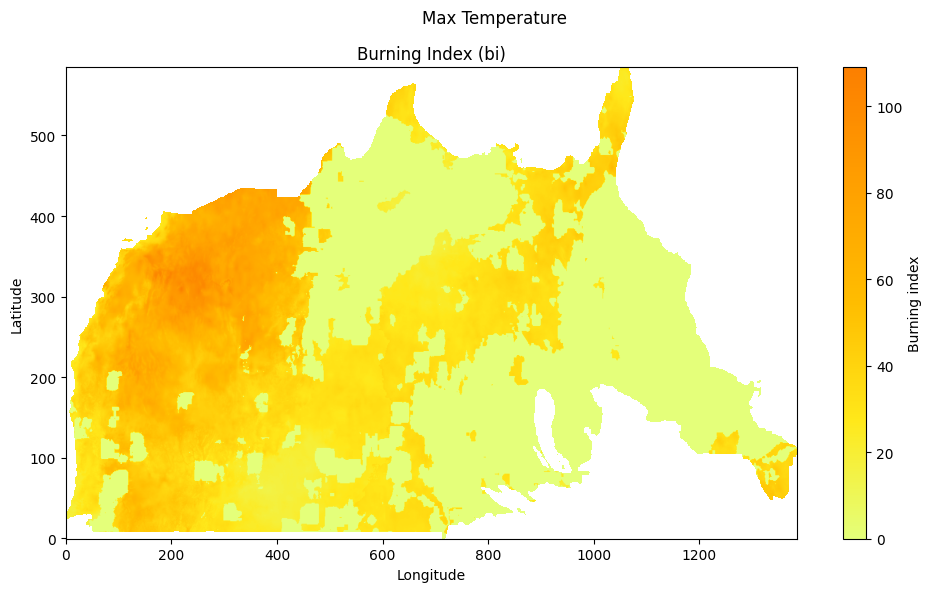

In [12]:
# Assuming `variable_ds` is the dataset with variables "tmmx" (max temperature) and "bi" (burning index)
fig, ax = plt.subplots(figsize=(10, 6))

# Color mapping visualization for "tmmx" (max temperature) using imshow
tmmx_data = variable_ds['bi'].values
im1 = ax.imshow(tmmx_data, cmap="Wistia", origin="lower", aspect='auto')
plt.colorbar(im1, ax=ax, orientation="vertical", label="Burning index")
ax.set_title("Burning Index (bi)")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Overall title
fig.suptitle("Max Temperature")

plt.tight_layout()
plt.show()

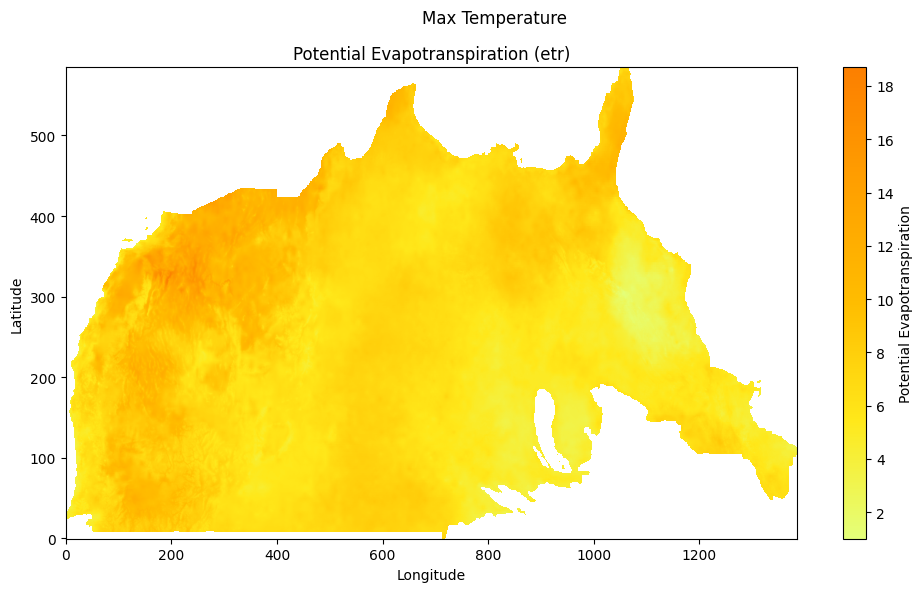

In [13]:
# Assuming `variable_ds` is the dataset with variables "tmmx" (max temperature) and "bi" (burning index)
fig, ax = plt.subplots(figsize=(10, 6))

# Color mapping visualization for "tmmx" (max temperature) using imshow
tmmx_data = variable_ds['etr'].values
im1 = ax.imshow(tmmx_data, cmap="Wistia", origin="lower", aspect='auto')
plt.colorbar(im1, ax=ax, orientation="vertical", label="Potential Evapotranspiration")
ax.set_title("Potential Evapotranspiration (etr)")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Overall title
fig.suptitle("Max Temperature")

plt.tight_layout()
plt.show()

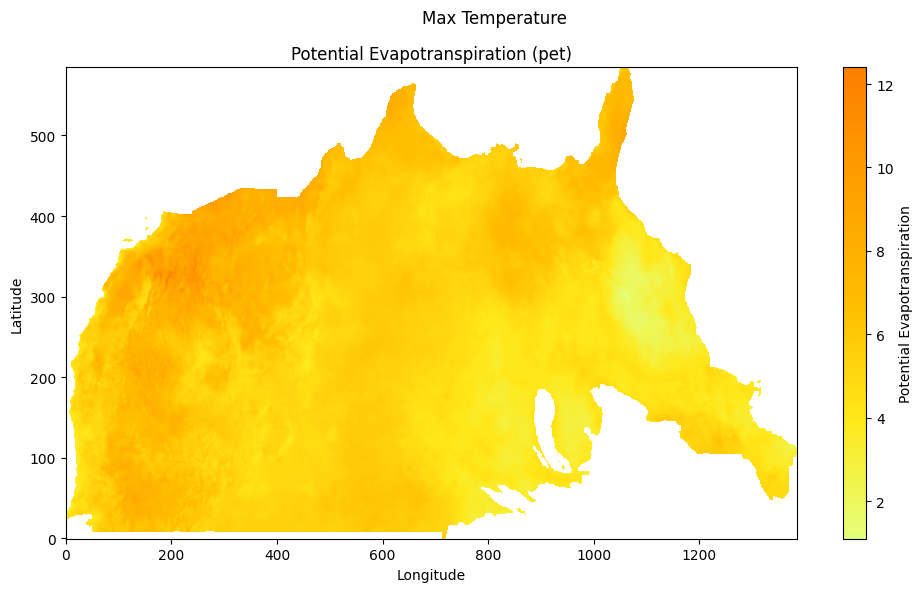

In [20]:
# Assuming `variable_ds` is the dataset with variables "tmmx" (max temperature) and "bi" (burning index)
fig, ax = plt.subplots(figsize=(10, 6))

# Color mapping visualization for "tmmx" (max temperature) using imshow
tmmx_data = variable_ds['pet'].values
im1 = ax.imshow(tmmx_data, cmap="Wistia", origin="lower", aspect='auto')
plt.colorbar(im1, ax=ax, orientation="vertical", label="Potential Evapotranspiration")
ax.set_title("Potential Evapotranspiration (pet)")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Overall title
fig.suptitle("Max Temperature")

plt.tight_layout()
plt.show()

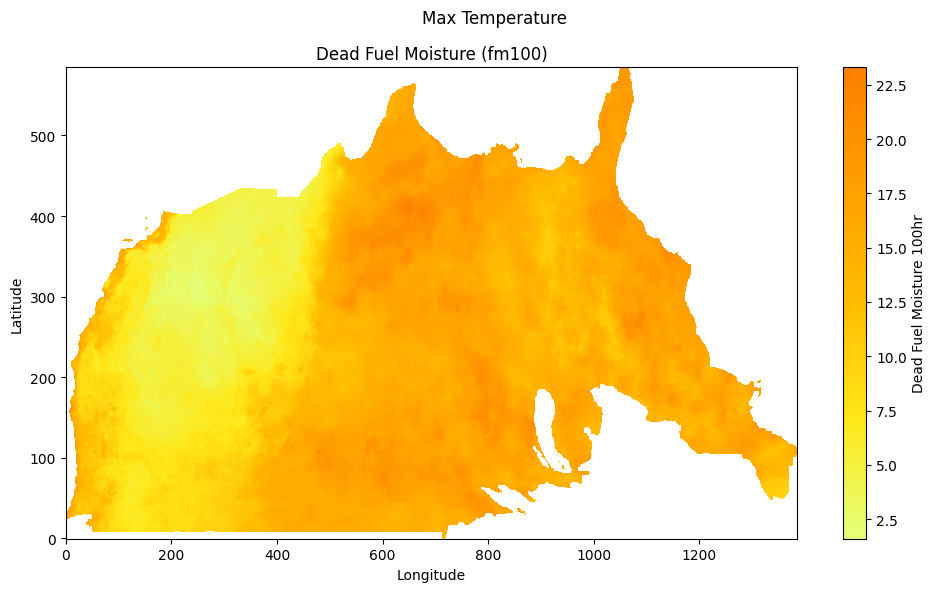

In [ ]:
# Assuming `variable_ds` is the dataset with variables "tmmx" (max temperature) and "bi" (burning index)
fig, ax = plt.subplots(figsize=(10, 6))

# Color mapping visualization for "tmmx" (max temperature) using imshow
tmmx_data = variable_ds['fm100'].values
im1 = ax.imshow(tmmx_data, cmap="Wistia", origin="lower", aspect='auto')
plt.colorbar(im1, ax=ax, orientation="vertical", label="Dead Fuel Moisture 100hr")
ax.set_title("Dead Fuel Moisture 100 hr (fm100)")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Overall title
fig.suptitle("Max Temperature")

plt.tight_layout()
plt.show()

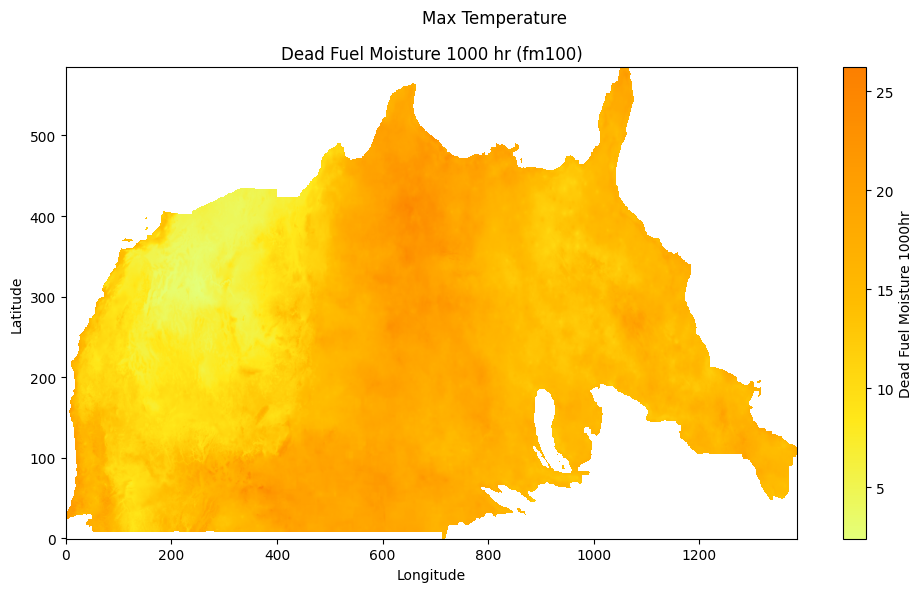

In [16]:
# Assuming `variable_ds` is the dataset with variables "tmmx" (max temperature) and "bi" (burning index)
fig, ax = plt.subplots(figsize=(10, 6))

# Color mapping visualization for "tmmx" (max temperature) using imshow
tmmx_data = variable_ds['fm1000'].values
im1 = ax.imshow(tmmx_data, cmap="Wistia", origin="lower", aspect='auto')
plt.colorbar(im1, ax=ax, orientation="vertical", label="Dead Fuel Moisture 1000hr")
ax.set_title("Dead Fuel Moisture 1000 hr (fm100)")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Overall title
fig.suptitle("Max Temperature")

plt.tight_layout()
plt.show()

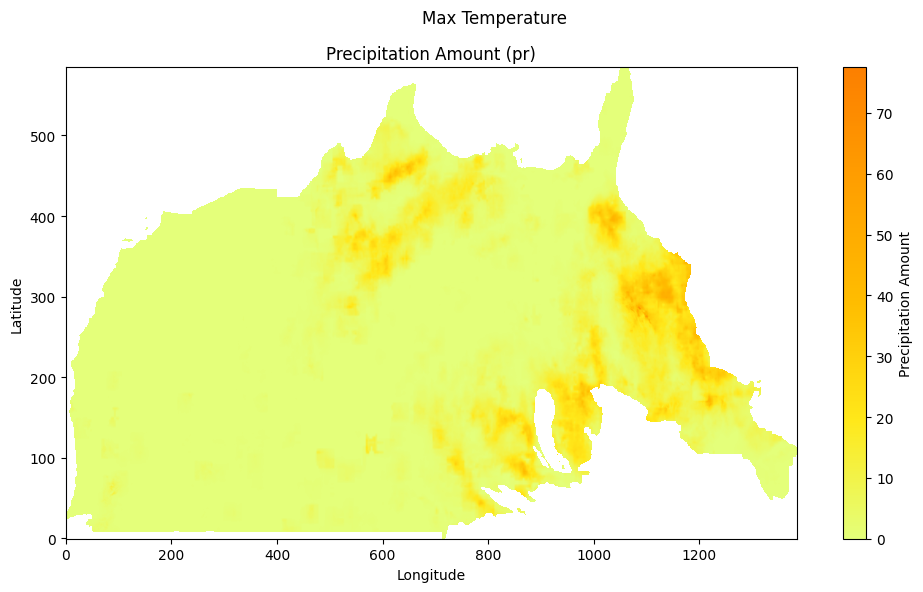

In [17]:
# Assuming `variable_ds` is the dataset with variables "tmmx" (max temperature) and "bi" (burning index)
fig, ax = plt.subplots(figsize=(10, 6))

# Color mapping visualization for "tmmx" (max temperature) using imshow
tmmx_data = variable_ds['pr'].values
im1 = ax.imshow(tmmx_data, cmap="Wistia", origin="lower", aspect='auto')
plt.colorbar(im1, ax=ax, orientation="vertical", label="Precipitation Amount")
ax.set_title("Precipitation Amount (pr)")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Overall title
fig.suptitle("Max Temperature")

plt.tight_layout()
plt.show()

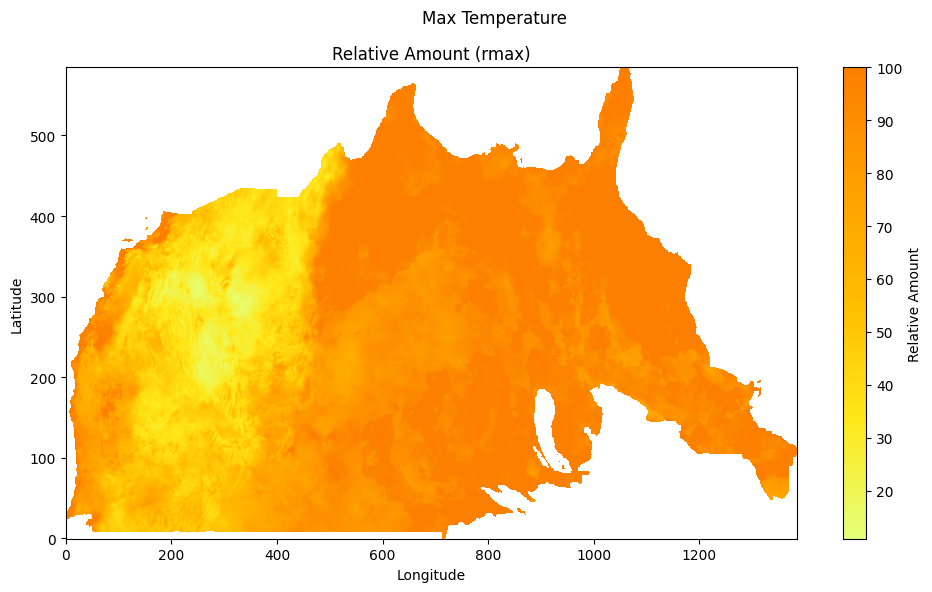

In [ ]:
# Assuming `variable_ds` is the dataset with variables "tmmx" (max temperature) and "bi" (burning index)
fig, ax = plt.subplots(figsize=(10, 6))

# Color mapping visualization for "tmmx" (max temperature) using imshow
tmmx_data = variable_ds['rmax'].values
im1 = ax.imshow(tmmx_data, cmap="Wistia", origin="lower", aspect='auto')
plt.colorbar(im1, ax=ax, orientation="vertical", label="Relative Humidity")
ax.set_title("Relative Humidity (rmax)")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Overall title
fig.suptitle("Max Temperature")

plt.tight_layout()
plt.show()

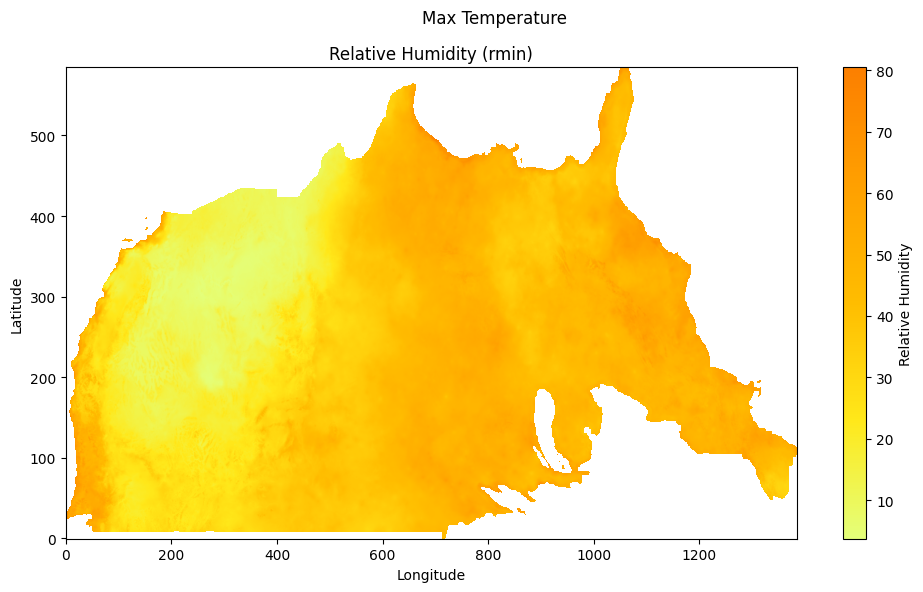

In [19]:
# Assuming `variable_ds` is the dataset with variables "tmmx" (max temperature) and "bi" (burning index)
fig, ax = plt.subplots(figsize=(10, 6))

# Color mapping visualization for "tmmx" (max temperature) using imshow
tmmx_data = variable_ds['rmin'].values
im1 = ax.imshow(tmmx_data, cmap="Wistia", origin="lower", aspect='auto')
plt.colorbar(im1, ax=ax, orientation="vertical", label="Relative Humidity")
ax.set_title("Relative Humidity (rmin)")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Overall title
fig.suptitle("Max Temperature")

plt.tight_layout()
plt.show()

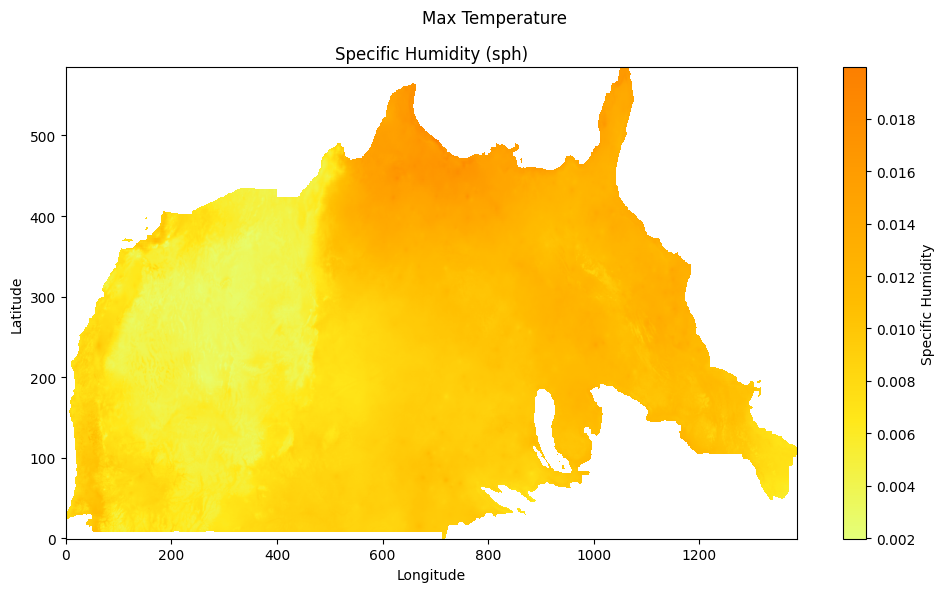

In [21]:
# Assuming `variable_ds` is the dataset with variables "tmmx" (max temperature) and "bi" (burning index)
fig, ax = plt.subplots(figsize=(10, 6))

# Color mapping visualization for "tmmx" (max temperature) using imshow
tmmx_data = variable_ds['sph'].values
im1 = ax.imshow(tmmx_data, cmap="Wistia", origin="lower", aspect='auto')
plt.colorbar(im1, ax=ax, orientation="vertical", label="Specific Humidity")
ax.set_title("Specific Humidity (sph)")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Overall title
fig.suptitle("Max Temperature")

plt.tight_layout()
plt.show()

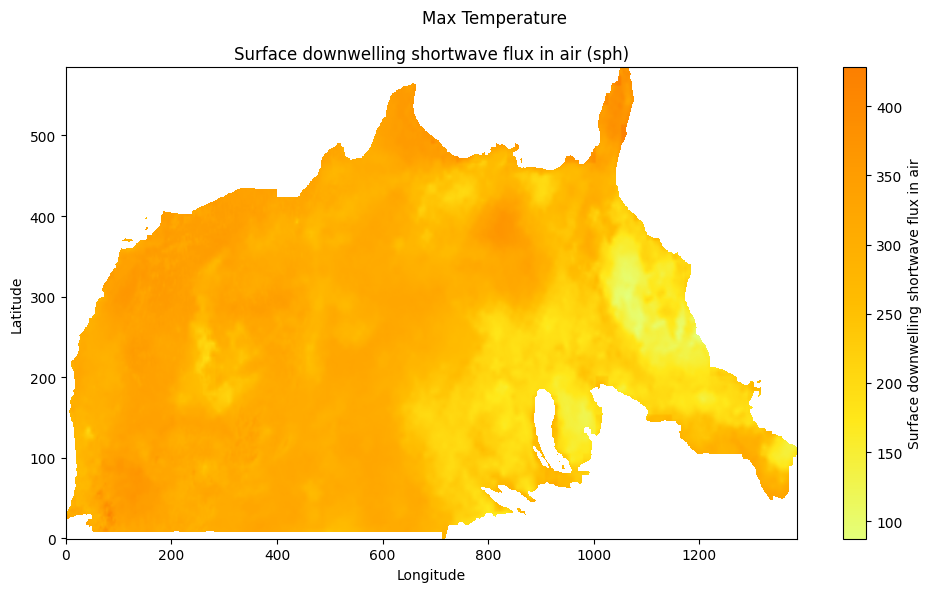

In [ ]:
# Assuming `variable_ds` is the dataset with variables "tmmx" (max temperature) and "bi" (burning index)
fig, ax = plt.subplots(figsize=(10, 6))

# Color mapping visualization for "tmmx" (max temperature) using imshow
tmmx_data = variable_ds['srad'].values
im1 = ax.imshow(tmmx_data, cmap="Wistia", origin="lower", aspect='auto')
plt.colorbar(im1, ax=ax, orientation="vertical", label="Surface downwelling shortwave flux in air")
ax.set_title("Surface downwelling shortwave flux in air (srad)")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Overall title
fig.suptitle("Max Temperature")

plt.tight_layout()
plt.show()

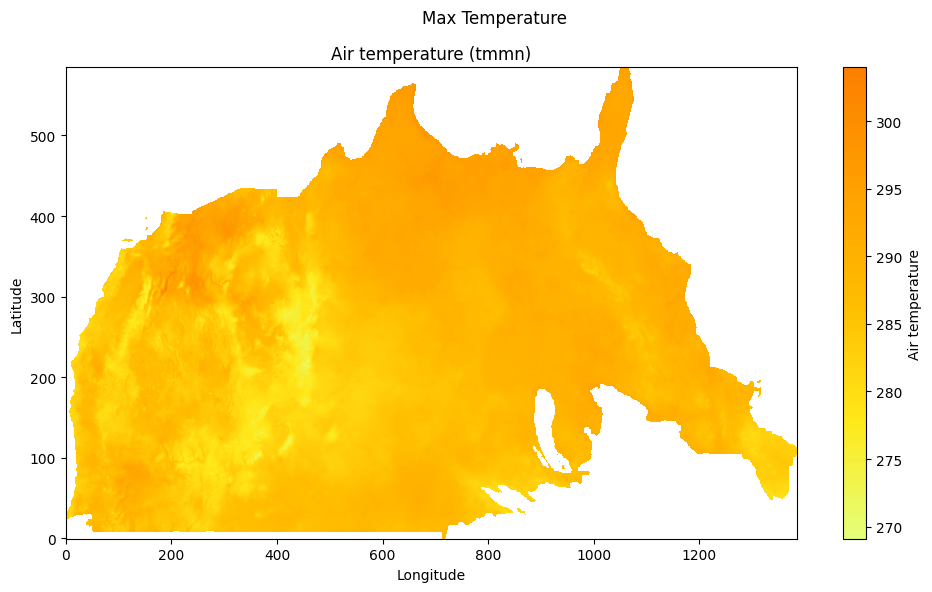

In [23]:
# Assuming `variable_ds` is the dataset with variables "tmmx" (max temperature) and "bi" (burning index)
fig, ax = plt.subplots(figsize=(10, 6))

# Color mapping visualization for "tmmx" (max temperature) using imshow
tmmx_data = variable_ds['tmmn'].values
im1 = ax.imshow(tmmx_data, cmap="Wistia", origin="lower", aspect='auto')
plt.colorbar(im1, ax=ax, orientation="vertical", label="Air temperature")
ax.set_title("Air temperature (tmmn)")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Overall title
fig.suptitle("Max Temperature")

plt.tight_layout()
plt.show()

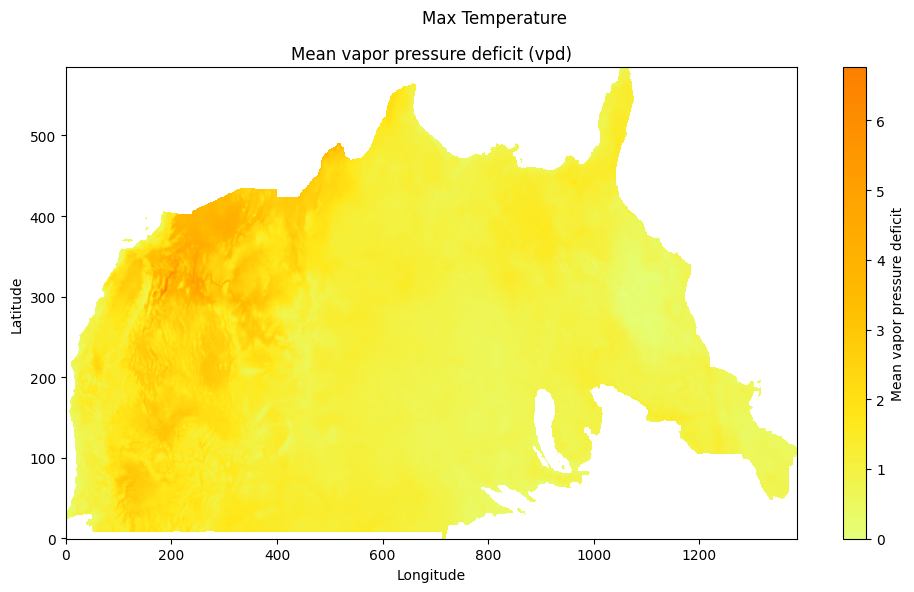

In [24]:
# Assuming `variable_ds` is the dataset with variables "tmmx" (max temperature) and "bi" (burning index)
fig, ax = plt.subplots(figsize=(10, 6))

# Color mapping visualization for "tmmx" (max temperature) using imshow
tmmx_data = variable_ds['vpd'].values
im1 = ax.imshow(tmmx_data, cmap="Wistia", origin="lower", aspect='auto')
plt.colorbar(im1, ax=ax, orientation="vertical", label="Mean vapor pressure deficit")
ax.set_title("Mean vapor pressure deficit (vpd)")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Overall title
fig.suptitle("Max Temperature")

plt.tight_layout()
plt.show()